## 时间戳范围

In [2]:
from tqdm.notebook import tqdm

min_timestamp = 1e19
max_timestamp = 0

with open('/data2/zhy/Movie_Recsys/MovieLens_1M_data/ratings.dat', 'r', encoding='ISO-8859-1') as f:
    lines = f.readlines()
    for line in tqdm(lines):
        user_id, item_id, rating, timestamp = line.strip().split('::')
        timestamp = int(timestamp)
        if timestamp < min_timestamp:
            min_timestamp = timestamp
        if timestamp > max_timestamp:
            max_timestamp = timestamp

print(f"Min timestamp: {min_timestamp}, Max timestamp: {max_timestamp}")
# 时间戳转换为日期时间格式
import time
print(f"Min date: {time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(min_timestamp))}, Max date: {time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(max_timestamp))}")

  0%|          | 0/1000209 [00:00<?, ?it/s]

Min timestamp: 956703932, Max timestamp: 1046454590
Min date: 2000-04-26 07:05:32, Max date: 2003-03-01 01:49:50


## 打分分布

  0%|          | 0/1000209 [00:00<?, ?it/s]

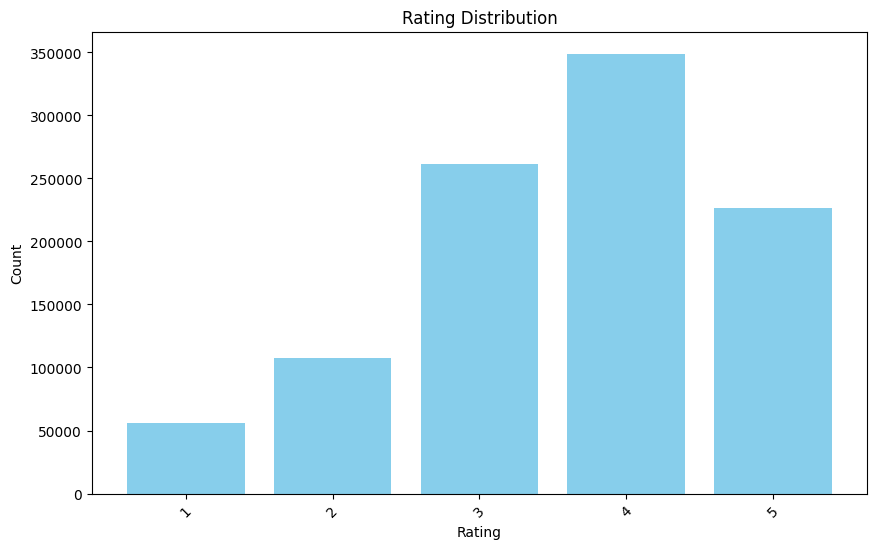

In [4]:
# 打分分布
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

rating_count = {}
for i in range(5):
    rating_count[str(i + 1)] = 0

with open('/data2/zhy/Movie_Recsys/MovieLens_1M_data/ratings.dat', 'r', encoding='ISO-8859-1') as f:
    lines = f.readlines()
    for line in tqdm(lines):
        user_id, item_id, rating, timestamp = line.strip().split('::')
        rating_count[rating] = rating_count.get(rating, 0) + 1

# 绘制评分分布图
plt.figure(figsize=(10, 6))
plt.bar(rating_count.keys(), rating_count.values(), color='skyblue')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Rating Distribution')
plt.xticks(rotation=45)
plt.show()
        


  0%|          | 0/1000209 [00:00<?, ?it/s]

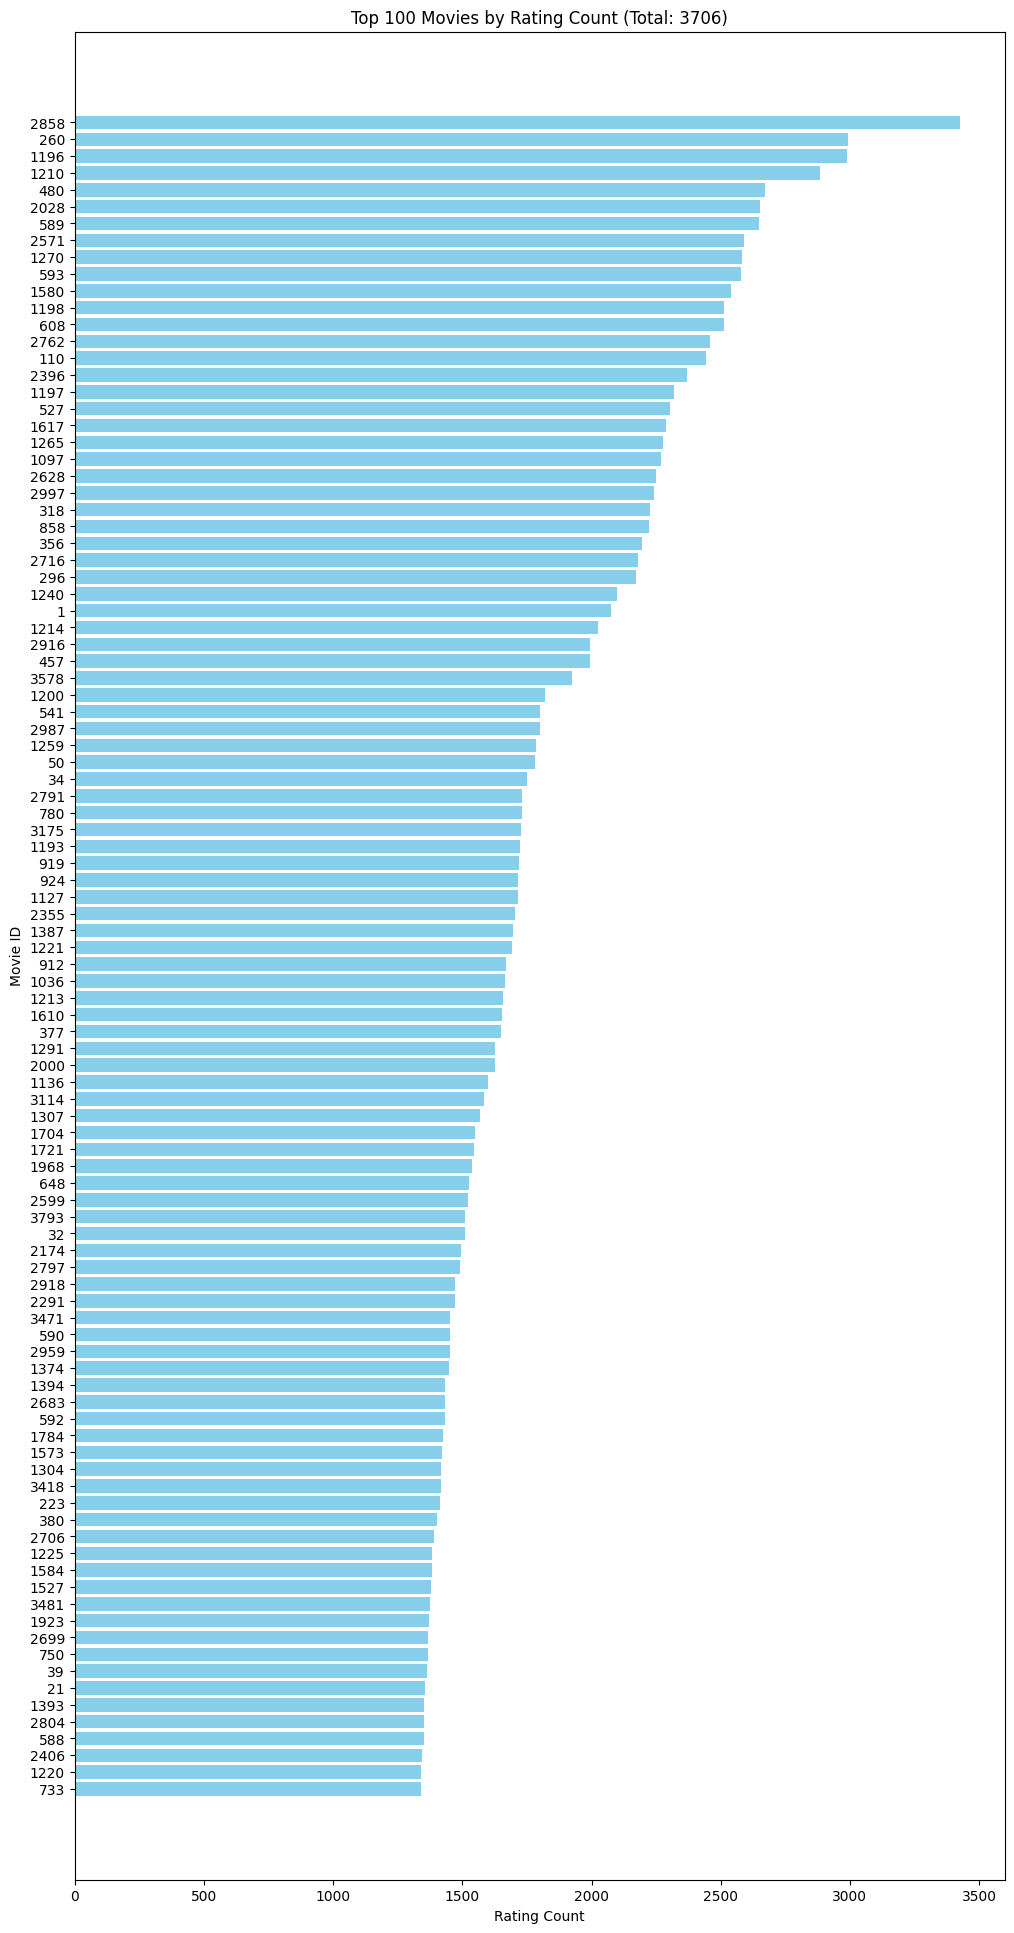

In [8]:
# 评分数排名前50的电影的评分数柱状图,横轴水平方向
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

movie_rating_count = {}
with open('/data2/zhy/Movie_Recsys/MovieLens_1M_data/ratings.dat', 'r', encoding='ISO-8859-1') as f:
    lines = f.readlines()
    for line in tqdm(lines):
        user_id, item_id, rating, timestamp = line.strip().split('::')
        movie_rating_count[item_id] = movie_rating_count.get(item_id, 0) + 1

top_100_movies = sorted(movie_rating_count.items(), key=lambda x: x[1], reverse=True)[:100]
movie_ids = [x[0] for x in top_100_movies]
rating_counts = [x[1] for x in top_100_movies]

plt.figure(figsize=(12, 24))
plt.barh(movie_ids, rating_counts, color='skyblue')
plt.xlabel('Rating Count')
plt.ylabel('Movie ID')
plt.title('Top 100 Movies by Rating Count (Total: %d)' % (len(movie_rating_count.keys())))
plt.gca().invert_yaxis()
plt.show()